Entity                          0
Code                            0
Year                            0
Self_harm                       0
Conflict_and_terrorism          0
Interpersonal_violence          0
Diabetes_and_kidney_diseases    0
Digestive_diseases              0
dtype: int64
1. India
2. Japan
3. England
Enter Your Choice: 1
Select Disease:
1. Diabetes and Kidney Diseases
2. Conflict_and_terrorism
3. Self-Harm
4. Interpersonal Violence
5. Digestive Diseases
Enter Your Choice: 4


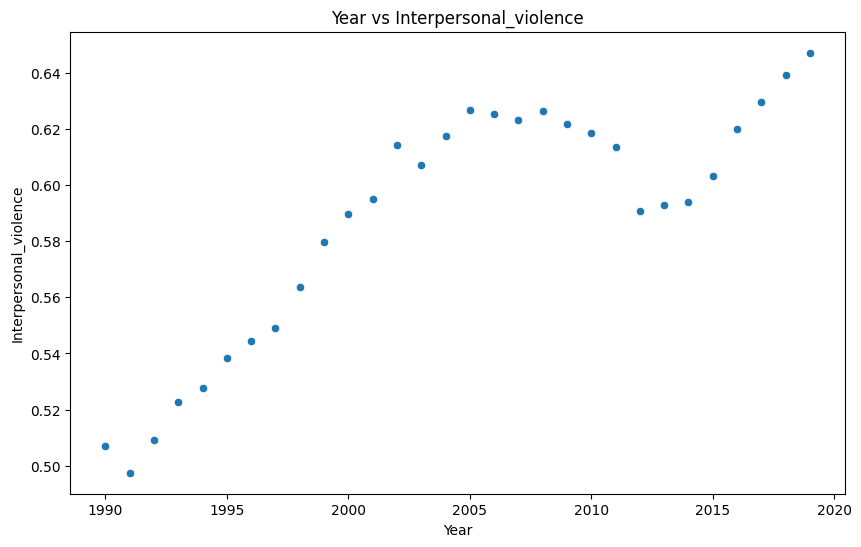

(24, 1) (6, 1)
Intercept: -8.258895422015987
Coefficient: 0.004412681754395037
      Actual  Predicted Interpersonal_violence
27  0.629513                          0.641484
15  0.626754                          0.588531
23  0.592787                          0.623833
17  0.623157                          0.597357
8   0.563660                          0.557643


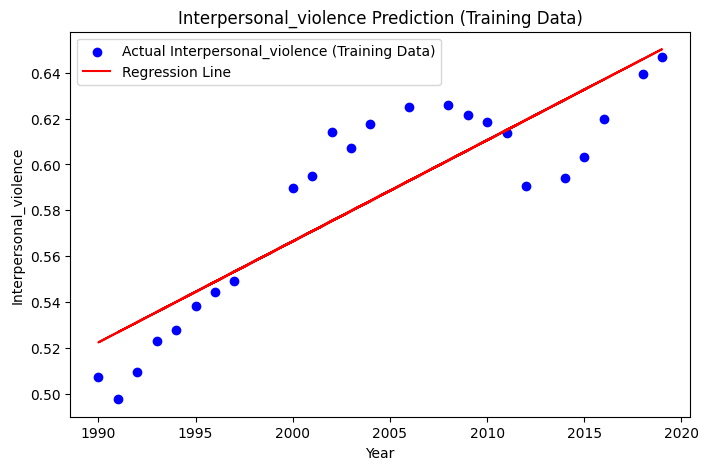

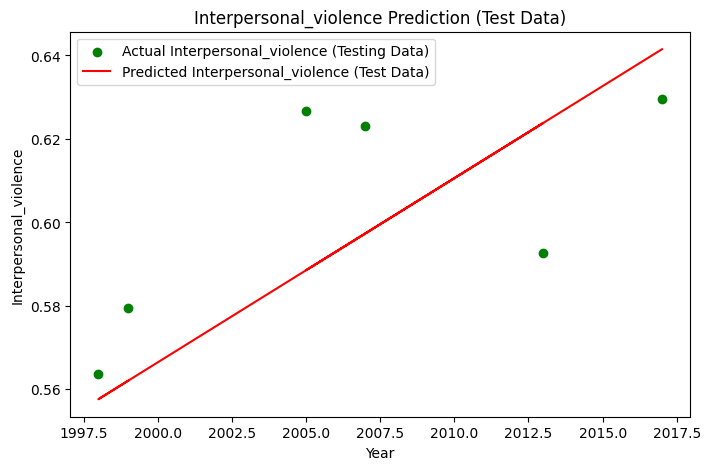

Mean Absolute Error: 0.021759193882353627
Mean Squared Error: 0.0005960300119880747
R-squared: 0.07689297411545393
Enter Year: 2025
Predicted Interpersonal_violence for 2025.0: 0.68


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('ML.csv')

# Checking for missing values
print(df.isnull().sum())

# Selecting country
print("1. India")
print("2. Japan")
print("3. England")
tr = int(input("Enter Your Choice: "))

if tr == 1:
    df = df[df['Entity'] == 'India']
elif tr == 2:
    df = df[df['Entity'] == 'Japan']
elif tr == 3:
    df = df[df['Entity'] == 'England']
else:
    print("Invalid Choice")
    exit()

# Selecting disease
print("Select Disease:")
print("1. Diabetes and Kidney Diseases")
print("2. Conflict_and_terrorism")
print("3. Self-Harm")
print("4. Interpersonal Violence")
print("5. Digestive Diseases")
disease_choice = int(input("Enter Your Choice: "))

disease_mapping = {
    1: 'Diabetes_and_kidney_diseases',
    2: 'Conflict_and_terrorism',
    3: 'Self_harm',
    4: 'Interpersonal_violence',
    5: 'Digestive_diseases'
}

if disease_choice in disease_mapping:
    disease = disease_mapping[disease_choice]
else:
    print("Invalid Choice")
    exit()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Year'], y=df[disease])
plt.title(f'Year vs {disease}')
plt.xlabel('Year')
plt.ylabel(disease)
plt.show()

# Splitting dataset
X = df[['Year']]
y = df[disease]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Predicting values
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, f'Predicted {disease}': y_pred})
print(results.head())

# Plot training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label=f"Actual {disease} (Training Data)")
plt.plot(X_train, model.predict(X_train), color='red', label="Regression Line")
plt.title(f'{disease} Prediction (Training Data)')
plt.xlabel('Year')
plt.ylabel(disease)
plt.legend()
plt.show()

# Plot test data
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='green', label=f"Actual {disease} (Testing Data)")
plt.plot(X_test, y_pred, color='red', label=f"Predicted {disease} (Test Data)")
plt.xlabel("Year")
plt.ylabel(disease)
plt.title(f"{disease} Prediction (Test Data)")
plt.legend()
plt.show()

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Predict future values
year_input = float(input("Enter Year: "))
predicted_value = model.predict([[year_input]])[0]
print(f"Predicted {disease} for {year_input}: {predicted_value:.2f}")


In [15]:

# Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
# Load the dataset
df = pd.read_csv('ML.csv')

# Display basic information
print("Dataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        90 non-null     object 
 1   Code                          90 non-null     object 
 2   Year                          90 non-null     int64  
 3   Self_harm                     90 non-null     float64
 4   Conflict_and_terrorism        90 non-null     float64
 5   Interpersonal_violence        90 non-null     float64
 6   Diabetes_and_kidney_diseases  90 non-null     float64
 7   Digestive_diseases            90 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.8+ KB

Summary Statistics:
              Year  Self_harm  Conflict_and_terrorism  Interpersonal_violence  \
count    90.000000  90.000000               90.000000               90.000000   
mean   2004.500000   2.184860                0.02

In [11]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Entity                          0
Code                            0
Year                            0
Self_harm                       0
Conflict_and_terrorism          0
Interpersonal_violence          0
Diabetes_and_kidney_diseases    0
Digestive_diseases              0
dtype: int64


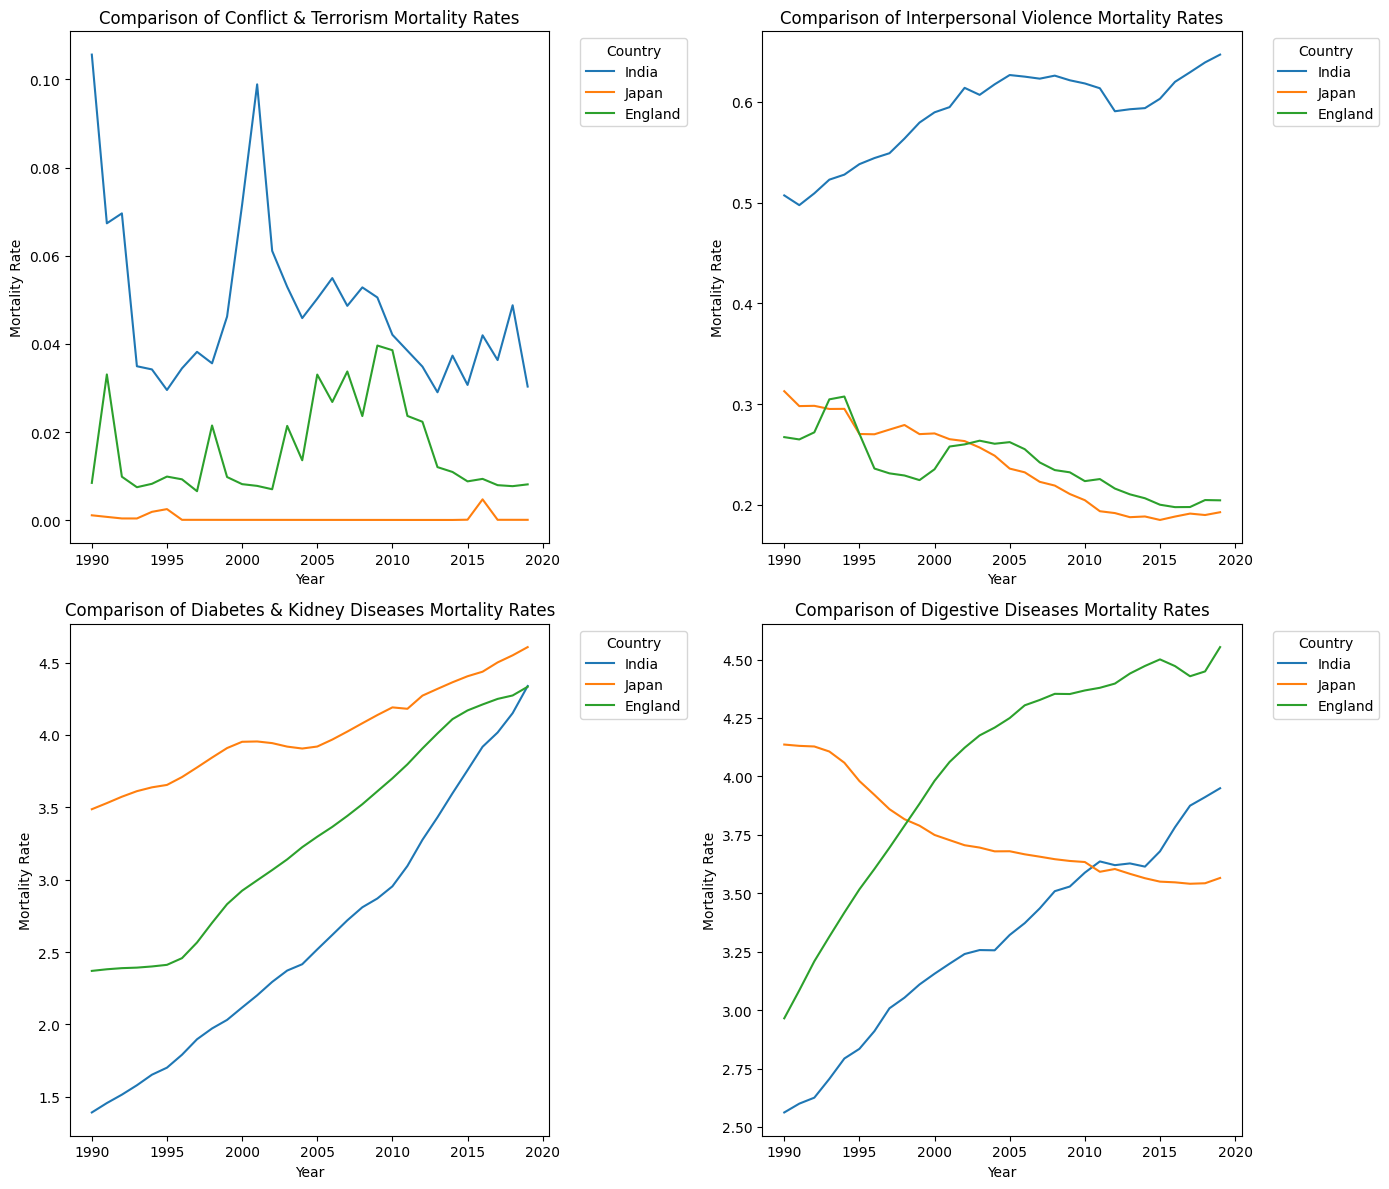

In [13]:
# Country-wise Comparison of Mortality Rates

# List of causes to compare
causes = ["Conflict_and_terrorism", "Interpersonal_violence", "Diabetes_and_kidney_diseases", "Digestive_diseases"]
titles = [
    "Comparison of Conflict & Terrorism Mortality Rates",
    "Comparison of Interpersonal Violence Mortality Rates",
    "Comparison of Diabetes & Kidney Diseases Mortality Rates",
    "Comparison of Digestive Diseases Mortality Rates",
]

# Plot each cause separately
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, cause in enumerate(causes):
    for country in df["Entity"].unique():
        country_data = df[df["Entity"] == country]
        sns.lineplot(data=country_data, x="Year", y=cause, label=country, ax=axes[i])

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Mortality Rate")
    axes[i].legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


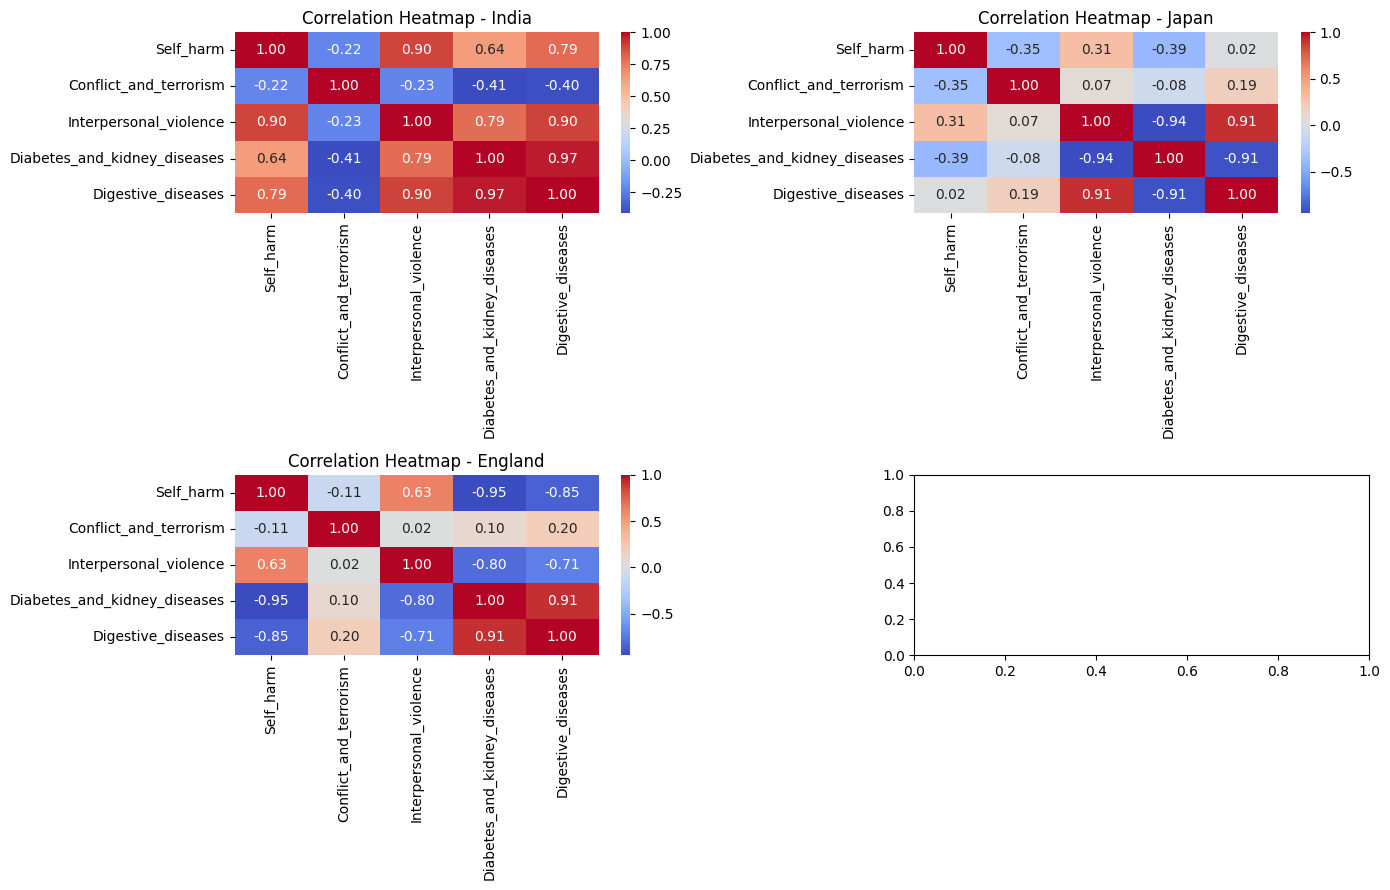

In [14]:
# Correlation Heatmaps for Different Countries

import matplotlib.pyplot as plt
import seaborn as sns

# Get unique countries
countries = df["Entity"].unique()

# Set up figure size
fig, axes = plt.subplots(len(countries) // 2 + len(countries) % 2, 2, figsize=(14, 3 * len(countries)))

# Flatten axes for easier iteration
axes = axes.flatten()

# Generate a heatmap for each country
for i, country in enumerate(countries):
    country_data = df[df["Entity"] == country].iloc[:, 3:]  # Selecting only numeric columns
    sns.heatmap(country_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[i])
    axes[i].set_title(f"Correlation Heatmap - {country}")

plt.tight_layout()
plt.show()
